In [2]:

import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
import os


In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'

zip_dir = tf.keras.utils.get_file('cats_and_dogs_filterted.zip', origin=_URL, extract=True)


68606236/68606236 [==============================] - 1s 0us/step


In [5]:
import os
base_dir = os.path.join(os.path.dirname(zip_dir),'cats_and_dogs_filtered')
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')


In [6]:
train_cats_dir = os.path.join(train_dir, 'cats')  # directory with our training cat pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')  # directory with our training dog pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')  # directory with our validation cat pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')  # directory with our validation dog pictures


In [7]:


num_cats_tr = len(os.listdir(train_cats_dir))
num_dogs_tr = len(os.listdir(train_dogs_dir))

num_cats_val = len(os.listdir(validation_cats_dir))
num_dogs_val = len(os.listdir(validation_dogs_dir))

total_train = num_cats_tr + num_dogs_tr
total_val = num_cats_val + num_dogs_val

In [8]:
print('total training cat images:', num_cats_tr)
print('total training dog images:', num_dogs_tr)

print('total validation cat images:', num_cats_val)
print('total validation dog images:', num_dogs_val)
print("--")
print("Total training images:", total_train)
print("Total validation images:", total_val)

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
--
Total training images: 2000
Total validation images: 1000


In [9]:
BATCH_SIZE = 100
IMG_SHAPE  = 150

In [10]:

def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

In [11]:
image_gen = ImageDataGenerator(rescale=1./255, horizontal_flip=True)

train_data_gen = image_gen.flow_from_directory(batch_size=BATCH_SIZE,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_SHAPE,IMG_SHAPE))


Found 2000 images belonging to 2 classes.


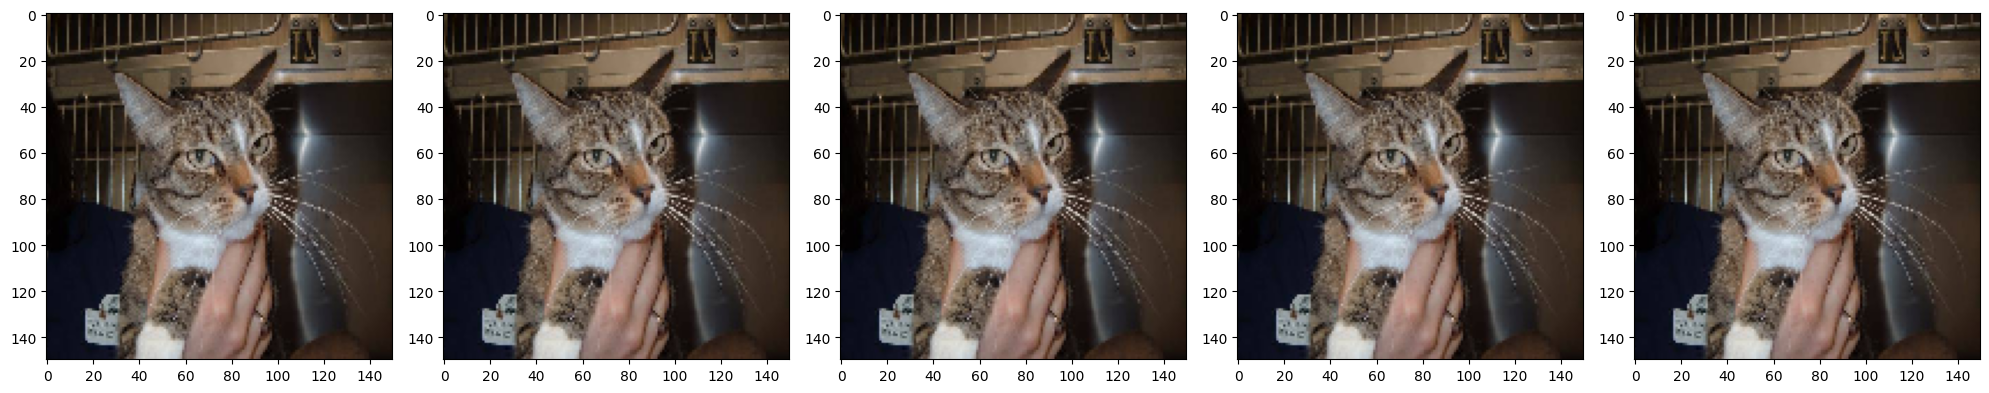

In [12]:

augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [13]:
image_gen = ImageDataGenerator(rescale=1./255, rotation_range=45)

train_data_gen = image_gen.flow_from_directory(batch_size=BATCH_SIZE,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_SHAPE, IMG_SHAPE))


Found 2000 images belonging to 2 classes.


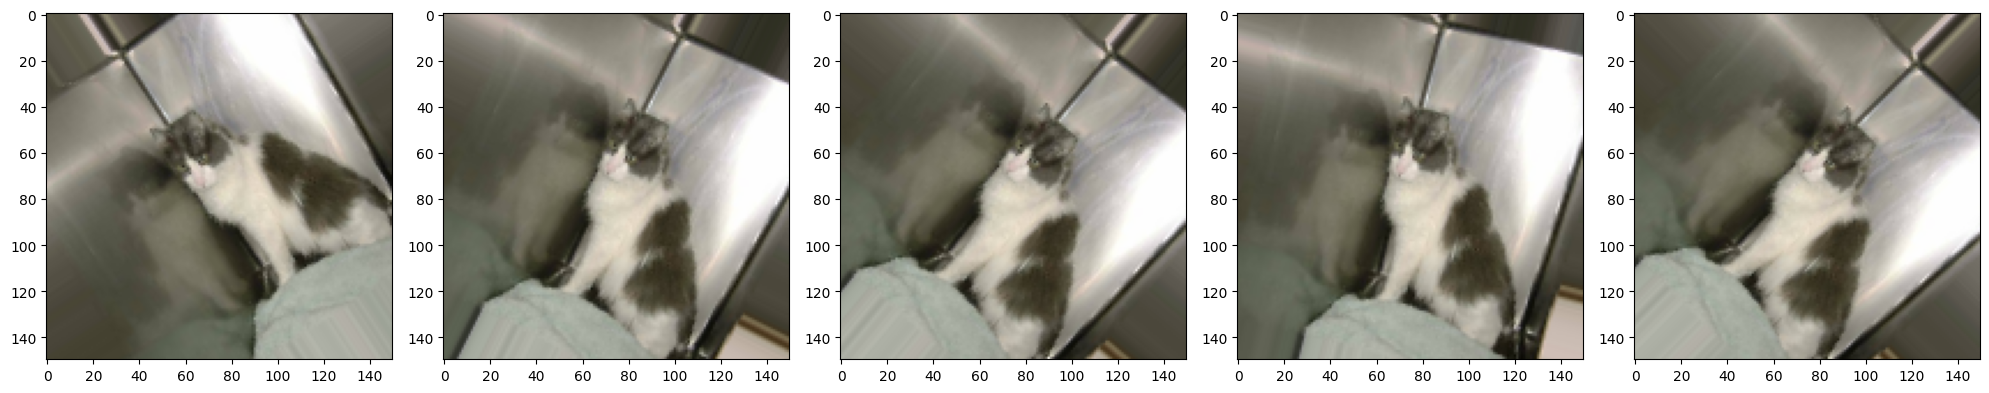

In [14]:

augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [15]:

image_gen = ImageDataGenerator(rescale=1./255, zoom_range=0.5)

train_data_gen = image_gen.flow_from_directory(batch_size=BATCH_SIZE,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_SHAPE, IMG_SHAPE))


Found 2000 images belonging to 2 classes.


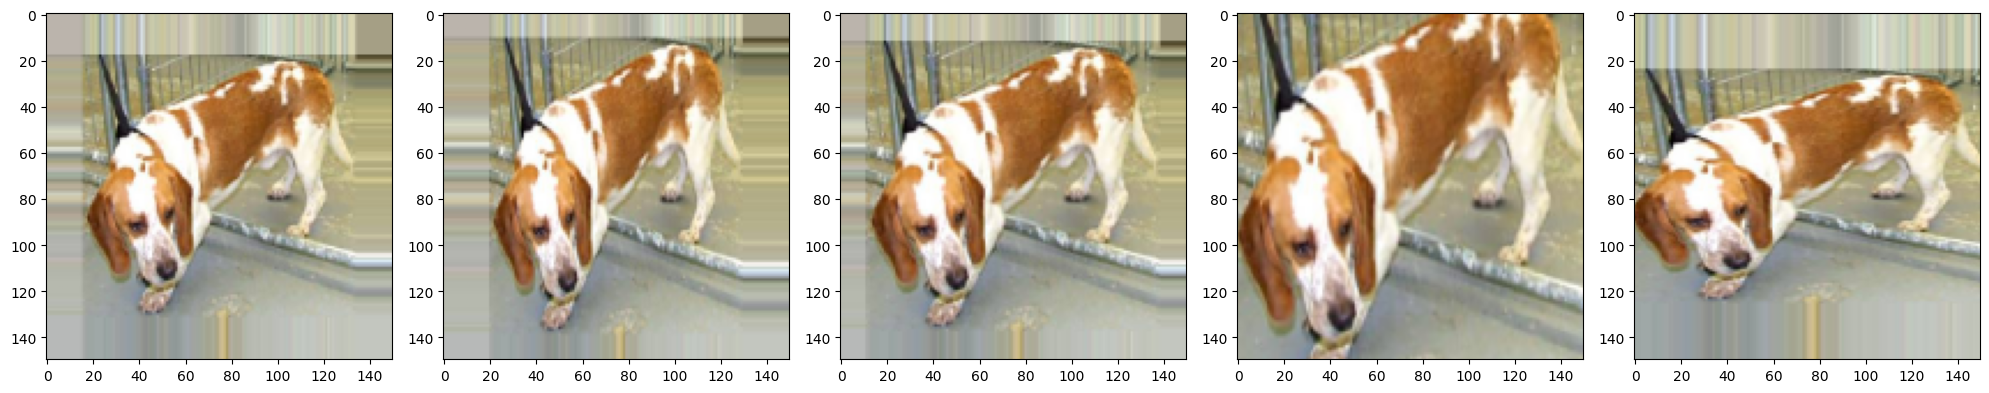

In [16]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [17]:
image_gen_train = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

train_data_gen = image_gen_train.flow_from_directory(batch_size=BATCH_SIZE,
                                                     directory=train_dir,
                                                     shuffle=True,
                                                     target_size=(IMG_SHAPE,IMG_SHAPE),
                                                     class_mode='binary')


Found 2000 images belonging to 2 classes.


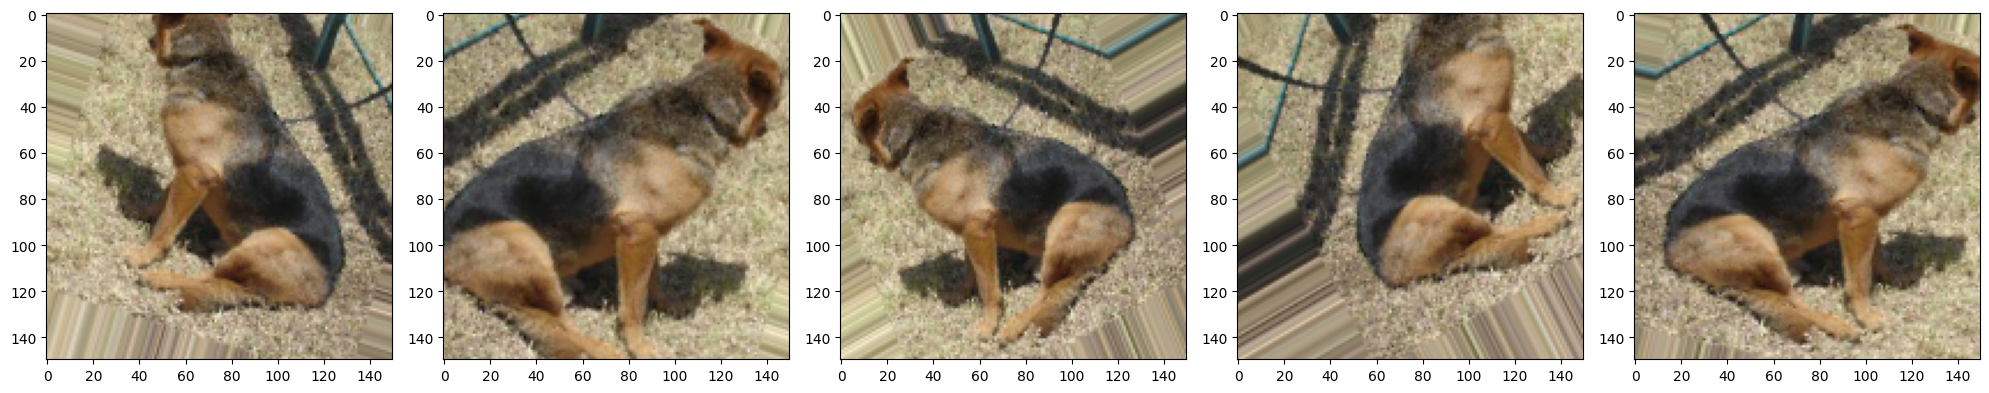

In [18]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [20]:
image_gen_val = ImageDataGenerator(rescale=1./255)

val_data_gen = image_gen_val.flow_from_directory(batch_size=BATCH_SIZE,
                                                 directory=validation_dir,
                                                 target_size=(IMG_SHAPE, IMG_SHAPE),
                                                 class_mode='binary')


Found 1000 images belonging to 2 classes.


In [21]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(2)
])


In [22]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0

In [24]:
epochs=10
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=int(np.ceil(total_train / float(BATCH_SIZE))),
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=int(np.ceil(total_val / float(BATCH_SIZE)))
)

<ipython-input-24-2939fac5536c>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/10
20/20 [==============================] - 132s 6s/step - loss: 0.7450 - accuracy: 0.4845 - val_loss: 0.6923 - val_accuracy: 0.5000
Epoch 2/10
20/20 [==============================] - 122s 6s/step - loss: 0.6915 - accuracy: 0.5245 - val_loss: 0.6881 - val_accuracy: 0.6040
Epoch 3/10
20/20 [==============================] - 125s 6s/step - loss: 0.6873 - accuracy: 0.5410 - val_loss: 0.6800 - val_accuracy: 0.5380
Epoch 4/10
20/20 [==============================] - 127s 6s/step - loss: 0.6784 - accuracy: 0.5680 - val_loss: 0.6755 - val_accuracy: 0.5370
Epoch 5/10
20/20 [==============================] - 127s 6s/step - loss: 0.6871 - accuracy: 0.5255 - val_loss: 0.6880 - val_accuracy: 0.5810
Epoch 6/10
20/20 [==============================] - 123s 6s/step - loss: 0.6860 - accuracy: 0.5500 - val_loss: 0.6758 - val_accuracy: 0.5660
Epoch 7/10
20/20 [==============================] - 121s 6s/step - loss: 0.6764 - accuracy: 0.5845 - val_loss: 0.6682 - val_accuracy: 0.5730
Epoch 8/10
20

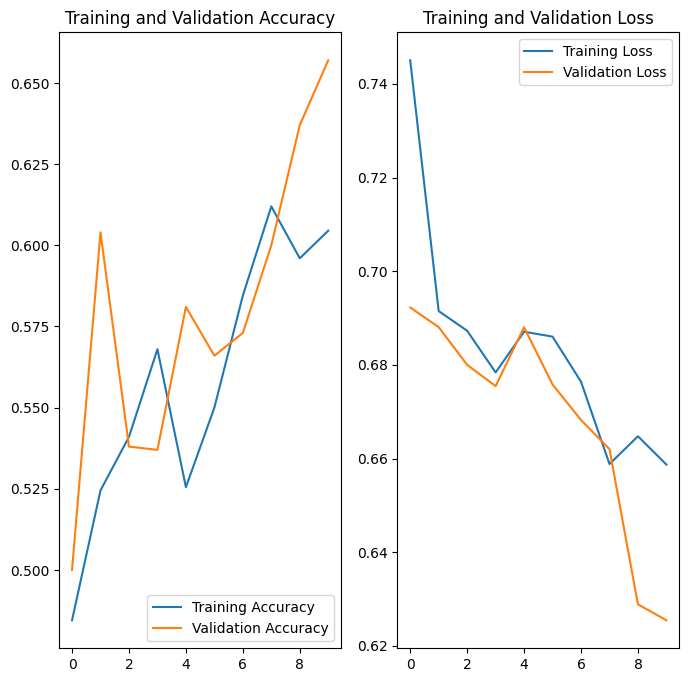

In [25]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [30]:
import numpy as np
import os
import cv2
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Directories
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
desired_path = '/content/drive/MyDrive/Colab Notebooks/ProdigyInfoTech/Task 3'

# Create the directory if it does not exist
os.makedirs(desired_path, exist_ok=True)
zip_dir = tf.keras.utils.get_file('cats_and_dogs_filterted.zip', origin=_URL, extract=True)
base_dir = os.path.join(os.path.dirname(zip_dir), 'cats_and_dogs_filtered')
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Image data generator for augmentation
IMG_SHAPE = 150
BATCH_SIZE = 100

image_gen_train = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_data_gen = image_gen_train.flow_from_directory(
    batch_size=BATCH_SIZE,
    directory=train_dir,
    shuffle=True,
    target_size=(IMG_SHAPE, IMG_SHAPE),
    class_mode='binary'
)

# Function to extract images and labels from the data generator
def extract_images_labels(data_gen, num_samples):
    images, labels = [], []
    for _ in range(num_samples // BATCH_SIZE):
        img_batch, label_batch = next(data_gen)
        for img, label in zip(img_batch, label_batch):
            img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)  # Convert to grayscale
            img = cv2.resize(img, (64, 64)).flatten()  # Resize and flatten
            images.append(img)
            labels.append(label)
    return np.array(images), np.array(labels)

# Load and preprocess training data
num_train_samples = train_data_gen.samples
X_train, y_train = extract_images_labels(train_data_gen, num_train_samples)

# Load and preprocess validation data
image_gen_val = ImageDataGenerator(rescale=1./255)
val_data_gen = image_gen_val.flow_from_directory(
    batch_size=BATCH_SIZE,
    directory=validation_dir,
    target_size=(IMG_SHAPE, IMG_SHAPE),
    class_mode='binary'
)

num_val_samples = val_data_gen.samples
X_val, y_val = extract_images_labels(val_data_gen, num_val_samples)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

# Train SVM model
svm_model = SVC(kernel='linear')  # Change kernel as needed
svm_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = svm_model.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
print(f"Validation Accuracy: {accuracy * 100:.2f}%")

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Validation Accuracy: 50.80%


Prediction raw output: 0.0


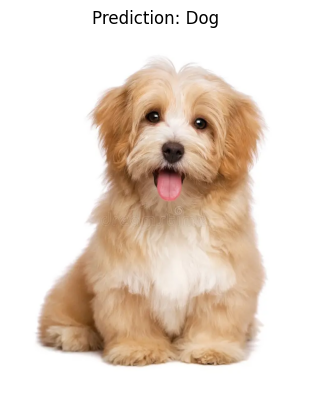

The image is a: Dog


In [31]:
import os
import cv2
import numpy as np
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

def predict_image(image_path, scaler, svm_model):
    # Check if image exists
    if not os.path.exists(image_path):
        raise ValueError("Invalid image path.")

    # Read and resize the image
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        raise ValueError("Failed to read image.")

    # Check image dimensions
    if img.shape[0] == 0 or img.shape[1] == 0:
        raise ValueError("Invalid image dimensions.")

    img_resized = cv2.resize(img, (64, 64)).flatten()
    img_scaled = scaler.transform([img_resized])
    prediction = svm_model.predict(img_scaled)

    # Debug prints
    print(f"Prediction raw output: {prediction[0]}")

    label = 'Dog' if prediction[0] == 0 else 'Cat'

    # Display the image
    img_bgr = cv2.imread(image_path)
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
    plt.imshow(img_rgb)
    plt.title(f"Prediction: {label}")
    plt.axis('off')
    plt.show()

    return label

# Example usage
image_path = '/content/drive/MyDrive/Colab Notebooks/ProdigyInfoTech/Task 3/pic.webp'  # Replace with actual image path
prediction = predict_image(image_path, scaler, svm_model)
print(f"The image is a: {prediction}")